In [0]:
# Import general useful packages
import numpy as np
import pandas as pd
import re

# Counter elements 
from collections import Counter

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 

# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scikitplot as skplt

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Import other useful subpackage
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
pip install scikit-plot

In [4]:
# Uploading data into google colab
from google.colab import files
df = files.upload()

Saving generic_tweets.txt to generic_tweets.txt


In [5]:
# Calling the Generic Tweets dataset
import io
df2 = pd.read_csv(io.BytesIO(df['generic_tweets.txt']))
df2.head(n=5)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
class    200000 non-null int64
id       200000 non-null int64
date     200000 non-null object
query    200000 non-null object
user     200000 non-null object
text     200000 non-null object
dtypes: int64(2), object(4)
memory usage: 9.2+ MB
None


Text(0.5, 1.0, 'Dataset labels distribuition')

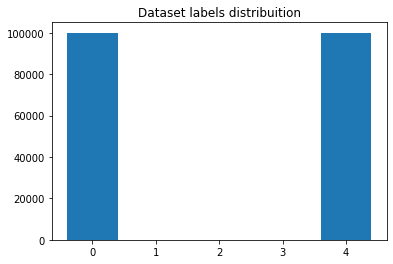

In [6]:
# check the data frame info
print(df2.info())
df2.rename(columns={"class": "sentiment"}, inplace=True)

# Get uniques values of sentiment column
df2['sentiment'].unique()

# Find count of individual sentiment and create a bar plot for better visualization
sen_cnt = Counter(df2.sentiment)

plt.figure(figsize=(6,4))
plt.bar(sen_cnt.keys(), sen_cnt.values())
plt.title("Dataset labels distribuition")


In [7]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

df2.text = df2.text.apply(lambda x: preprocess(x))

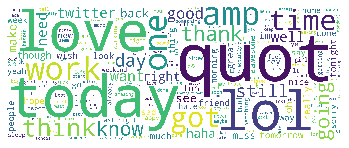

In [9]:
# all tweets 
all_words = " ".join(df2.text)

# Wordcloud of tweets
wordcloud = WordCloud(height=2000, width=5000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
# Replacing the class value to integer
#df2.sentiment.replace(('positive', 'negative'), (4, 0), inplace=True)
#print(df2)

In [10]:
# tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = df2['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, update, facebook, texting, might, cry,...
2    [dived, many, times, ball, managed, save, 50, ...
3              [whole, body, feels, itchy, like, fire]
4                                 [behaving, mad, see]
Name: text, dtype: object

In [11]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, updat, facebook, text, might, cri, res...
2    [dive, mani, time, ball, manag, save, 50, rest...
3               [whole, bodi, feel, itchi, like, fire]
4                                    [behav, mad, see]
Name: text, dtype: object

In [12]:
# let’s stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df2['text'] = tokenized_tweet
print(df2)

        sentiment  ...                                               text
0               0  ...       awww bummer shoulda got david carr third day
1               0  ...  upset updat facebook text might cri result sch...
2               0  ...    dive mani time ball manag save 50 rest go bound
3               0  ...                    whole bodi feel itchi like fire
4               0  ...                                      behav mad see
...           ...  ...                                                ...
199995          4  ...                 haha remark matern leav fire littl
199996          4  ...                                                   
199997          4  ...  oki doke time escap north massa back turn get ...
199998          4  ...                               finish lesson hooray
199999          4  ...   ppl fuck kp0 cb stop ask laa love boyfriend that

[200000 rows x 6 columns]


In [14]:
# Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
# We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df2['text'])
print(bow)

  (0, 74)	1
  (0, 373)	1
  (0, 224)	1
  (0, 225)	1
  (1, 917)	1
  (1, 915)	1
  (1, 296)	1
  (1, 860)	1
  (1, 208)	1
  (1, 708)	1
  (1, 735)	1
  (1, 877)	1
  (1, 105)	1
  (2, 540)	1
  (2, 874)	1
  (2, 79)	1
  (2, 539)	1
  (2, 730)	1
  (2, 12)	1
  (2, 707)	1
  (3, 112)	1
  (3, 313)	1
  (3, 507)	1
  (4, 535)	1
  (6, 590)	1
  :	:
  (199992, 552)	1
  (199992, 803)	1
  (199992, 594)	1
  (199992, 387)	1
  (199992, 130)	1
  (199993, 612)	1
  (199993, 970)	1
  (199993, 943)	1
  (199994, 373)	1
  (199994, 612)	1
  (199994, 477)	1
  (199995, 498)	1
  (199995, 387)	1
  (199995, 513)	1
  (199997, 874)	1
  (199997, 900)	1
  (199997, 422)	1
  (199998, 323)	1
  (199998, 501)	1
  (199999, 526)	1
  (199999, 61)	1
  (199999, 662)	1
  (199999, 822)	1
  (199999, 347)	1
  (199999, 121)	1


In [0]:
# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df2['text'])

In [0]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df2['sentiment'], test_size = 0.3, random_state = 3)

In [0]:
# Applying various Classification algorithms without doing variable reductions
accuracy_scores = np.zeros(7)

# Support Vector Classifier
svm = SVC().fit(X_train, y_train)
prediction1 = svm.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
logis = LogisticRegression().fit(X_train, y_train)
prediction2 = logis.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
prediction3 = knn.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Gaussian Naive Bayes
#clf = GaussianNB().fit(X_train, y_train)
#prediction4 = clf.predict(X_test)
#accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
#print('Gaussian Naive Bayes Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Decision Tree
decision = DecisionTreeClassifier().fit(X_train, y_train)
prediction4 = decision.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores[3]))


# Random Forest
random = RandomForestClassifier().fit(X_train, y_train)
prediction5 = random.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction5)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[4]))

# Gradient Boosting
GB = GradientBoostingClassifier().fit(X_train, y_train)
prediction6 = GB.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction6)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[5]))

#XGBoosting
xgb_model = xgb.XGBClassifier() 
xgb_model.fit(X_train, y_train)
prediction7 = xgb_model.predict(X_test)
accuracy_scores[6] = accuracy_score(y_test, prediction7)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[6]))



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 71.74000000000001%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy: 74.19333333333333%
K Nearest Neighbors Classifier accuracy: 66.84833333333333%
Decision Tree Classifier accuracy: 67.38833333333332%


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier accuracy: 70.435%
Gradient Boosting Classifier accuracy: 67.76333333333334%
XGBoost Classifier accuracy: 67.39666666666668%


Text(0.5, 1.0, 'Accuracy of various algorithms')

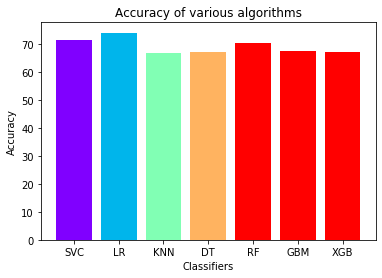

In [0]:
# Accuracy comparison of various algorithms
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'KNN','DT', 'RF', 'GBM', 'XGB']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

              precision    recall  f1-score   support

           0       0.77      0.69      0.73     30135
           4       0.72      0.79      0.75     29865

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



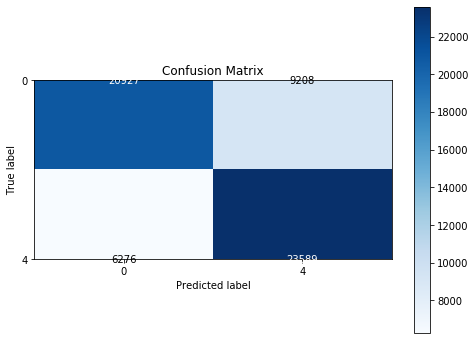

In [0]:
# check validation statistics (Classification Summary)
print(classification_report(y_test, prediction2)) # from confusion matrix Logistics Regression perform well
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, prediction2, figsize=(8, 6))
plt.show()

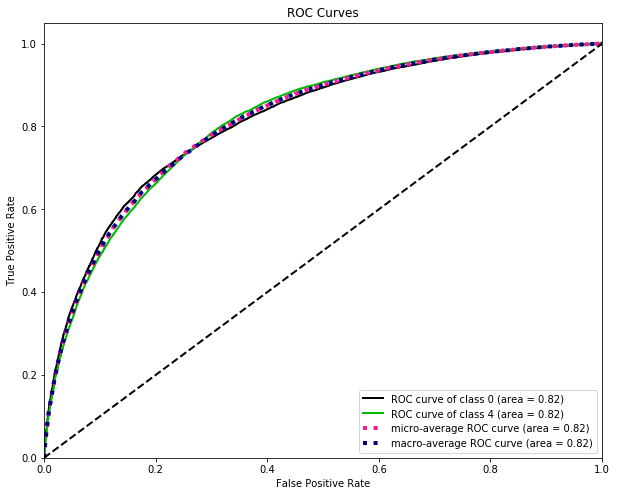

In [0]:
# ROC Curves
y_probas = logis.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

In [17]:
#### Canadian Elections

# Uploading data into google colab
from google.colab import files
candf = files.upload()

# Calling the Generic Tweets dataset
import io
candf2 = pd.read_csv(io.BytesIO(candf['Canadian_elections.csv']))
candf2.head(n=5)


Saving Canadian_elections.csv to Canadian_elections.csv


,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


In [18]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

candf2.text = candf2.text.apply(lambda x: preprocess(x))

In [20]:
# Replacing the class value to integer
candf2.sentiment.replace(('positive', 'negative'), (4, 0), inplace=True)
print(candf2)

      sentiment  ...                                               text
0             0  ...  b rosiebarton instead suggestion agree canadia...
1             4  ...  b allwomanspacewalk real n n etobicokenorth ci...
2             0  ...  b brantford going cost 94 billion next 4 years...
3             4  ...  b canada canadaelection2019 canadavotes n elxn...
4             0  ...  b canada taxpayers sick amp tired hard earned ...
...         ...  ...                                                ...
2128          0  ...  b know good enough job smearing campaign right...
2129          0  ...  b missed comment deflecting issue answer best ...
2130          4  ...  b daily reminder n endorses strategic voting n...
2131          0  ...  b yup going reopen abortion debate xf0 x9f x98...
2132          4  ...                                b zing n ndp elxn43

[2133 rows x 3 columns]


In [21]:
# tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = candf2['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [b, rosiebarton, instead, suggestion, agree, c...
1    [b, allwomanspacewalk, real, n, n, etobicokeno...
2    [b, brantford, going, cost, 94, billion, next,...
3    [b, canada, canadaelection2019, canadavotes, n...
4    [b, canada, taxpayers, sick, amp, tired, hard,...
Name: text, dtype: object

In [22]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [b, rosiebarton, instead, suggest, agre, canad...
1    [b, allwomanspacewalk, real, n, n, etobicokeno...
2    [b, brantford, go, cost, 94, billion, next, 4,...
3    [b, canada, canadaelection2019, canadavot, n, ...
4    [b, canada, taxpay, sick, amp, tire, hard, ear...
Name: text, dtype: object

In [23]:
# let’s stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

candf2['text'] = tokenized_tweet
print(candf2)

      sentiment  ...                                               text
0             0  ...  b rosiebarton instead suggest agre canadian wo...
1             4  ...  b allwomanspacewalk real n n etobicokenorth ci...
2             0  ...  b brantford go cost 94 billion next 4 year ask...
3             4  ...  b canada canadaelection2019 canadavot n elxn43...
4             0  ...  b canada taxpay sick amp tire hard earn donat ...
...         ...  ...                                                ...
2128          0  ...  b know good enough job smear campaign right an...
2129          0  ...  b miss comment deflect issu answer best respon...
2130          4  ...  b daili remind n endors strateg vote n elxn43 ...
2131          0  ...  b yup go reopen abort debat xf0 x9f x98 x8f n ...
2132          4  ...                                b zing n ndp elxn43

[2133 rows x 3 columns]


In [24]:
# Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
# We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(candf2['text'])
print(bow)

  (0, 725)	1
  (0, 408)	1
  (0, 812)	1
  (0, 40)	1
  (0, 111)	1
  (0, 919)	1
  (0, 867)	1
  (0, 56)	1
  (0, 176)	1
  (0, 348)	1
  (0, 664)	1
  (0, 918)	1
  (0, 723)	1
  (0, 453)	1
  (0, 131)	1
  (0, 107)	1
  (0, 18)	1
  (1, 131)	1
  (1, 691)	1
  (1, 591)	1
  (2, 131)	1
  (2, 107)	1
  (2, 188)	1
  (2, 87)	1
  (2, 992)	1
  :	:
  (2129, 436)	1
  (2129, 58)	1
  (2129, 924)	1
  (2129, 495)	1
  (2129, 517)	1
  (2129, 71)	1
  (2129, 328)	1
  (2130, 131)	1
  (2130, 538)	1
  (2130, 892)	1
  (2130, 479)	1
  (2130, 266)	1
  (2130, 706)	1
  (2130, 269)	1
  (2130, 801)	1
  (2130, 350)	1
  (2131, 18)	1
  (2131, 988)	1
  (2131, 963)	1
  (2131, 944)	1
  (2131, 735)	1
  (2131, 736)	1
  (2131, 951)	1
  (2131, 214)	1
  (2132, 538)	1


In [0]:
# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(candf2['text'])

In [0]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(bow, candf2['sentiment'], test_size = 0.1, random_state = 3)

In [0]:
# Applying various Classification algorithms without doing variable reductions

#predicting various Classification algorithms 
accuracy_scores = np.zeros(3)

# Support Vector Classifier
prediction_svm = svm.predict(X_valid)
accuracy_scores[0] = accuracy_score(y_valid, prediction_svm)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
prediction_logit = logis.predict(X_valid)
accuracy_scores[1] = accuracy_score(y_valid, prediction_logit)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# Random Forest
prediction_random = random.predict(X_valid)
accuracy_scores[2] = accuracy_score(y_valid, prediction_random)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Support Vector Classifier accuracy: 51.4018691588785%
Logistic Regression accuracy: 48.598130841121495%
Random Forest Classifier accuracy: 48.598130841121495%


Text(0.5, 1.0, 'Accuracy of various algorithms')

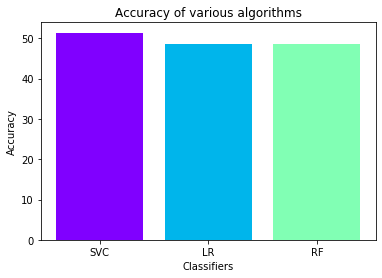

In [0]:
# Accuracy comparison of various algorithms
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'RF']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

In [0]:
# taking logistic regression as a final model (stable accuracy on new data)
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

#Model hypertune
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
#Model after tuning
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score, grid_result.best_params))

# Logistic Regression accuracy after hypertuning
prediction_logit_new = grid_result.predict(X_valid)
accuracy_scores_logit_new = accuracy_score(y_valid, prediction_logit_new)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores_logit_new))

In [32]:
candf2.info()
candf2.negative_reason.replace(('Healthcare and Marijuana'), ("Healthcare"), inplace=True)
candf3 = candf2[candf2.negative_reason != 'Others']
#candf3.head(n=50)
# Replacing the class value to integer
#candf4=candf3.negative_reason.replace(('NaN'), ('NA'), inplace=True)
import numpy as np
candf4 = candf3.replace(np.nan, '', regex=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 3 columns):
sentiment          2133 non-null int64
negative_reason    1007 non-null object
text               2133 non-null object
dtypes: int64(1), object(2)
memory usage: 50.1+ KB


In [33]:
# Data cleaning and pre-process dataset
nltk.download('stopwords')

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" 
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

candf3.text = candf3.text.apply(lambda x: preprocess(x))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder # instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
candf3['negative_reason'] =  le.fit_transform(candf3.negative_reason.values)

TypeError: ignored

In [0]:
# tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, 
# and tokenization is the process of splitting a string of text into tokens
tokenized_tweet = candf2['text'].apply(lambda x: x.split())
tokenized_tweet.head()

In [0]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

# let’s stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

candf2['text'] = tokenized_tweet
print(candf2)

# Bag-of-Words features can be easily created using sklearn’s CountVectorizer function. 
# We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(candf2['text'])
print(bow)


# TF-IDF works by penalizing the common words by assigning them lower weights while giving 
# importance to words which are rare in the entire corpus but appear in good numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(candf2['text'])


In [0]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(bow, candf2['sentiment'], test_size = 0.1, random_state = 3)

In [0]:
# taking logistic regression as a final model (stable accuracy on new data)
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

#Model hypertune
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
#Model after tuning
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score, grid_result.best_params))

# Logistic Regression accuracy after hypertuning
prediction_logit_new = grid_result.predict(X_valid)
accuracy_scores_logit_new = accuracy_score(y_valid, prediction_logit_new)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores_logit_new))